In [1]:
# fetch_openml is a fucntion from sklearn.datasets module of scikit learn.
# Openml is a online service which stores large number of datasets
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)# 784 refers to 28*28 pixel images of handwritten digits

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Datasets loaded by Scikit-Learn generally have a similar dictionary structure including:


1)A DESCR key describing the dataset a textual representation of what the data is!!


2)A data key containing an array with one row per instance and one column per feature.
**This array** is where the actual image data is stored. Each row corresponds to an image, and each column corresponds to a pixel value (ranging from 0 to 255) >>> for gray scale image >>> for color image it is **rgb**                                      
  2*2 pixels might look like    
[[0, 255],                            
[128, 64]]                        
Here, 0 is black, 255 is white, 128 is a medium gray, and 64 is a darker gray.



3)A target key containing an array with the labels

In [34]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [36]:
import numpy as np
X = np.array(mnist["data"])
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
y = np.array(mnist["target"])
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [39]:
X.shape

(70000, 784)

In [40]:
y.shape

(70000,)

In [41]:
some_digit = X[3]
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [42]:
some_digit_image = some_digit.reshape(28,28)
'''We use reshape to transform a flat array
of pixel values into a 2D grid, which allows us to
visualize and process the data as an image.'''
some_digit_image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

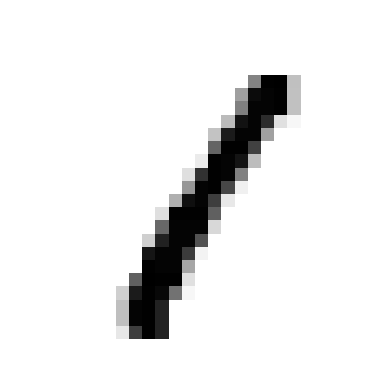

In [43]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [44]:
y[3] #lets see what label tells us

'1'

In [45]:
y = y.astype(np.uint8) # since label is a string lets cast it into integers

In [46]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [47]:
y_train_1 = (y_train == 1)
'''y_train == 1 returns True where 1 is there and False where it is not
which is then stored in the variable y_train_1 in the form of array'''
print(y_train_1)
y_test_1 = (y_test == 1)
print(y_test_1)

[False False False ... False False False]
[False False  True ... False False False]


**5-detector** Binary Classification problem

Classifying among two classes either 5 or not 5

In [53]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=41)
sgd_clf.fit(X_train,y_train_1)

SGDClassifier(random_state=41)

In [54]:
sgd_clf.predict([some_digit])

array([ True])

In [55]:
sgd_clf.predict([X[8]])

array([ True])

In [56]:
y[8]

1

In [57]:
sgd_clf.predict([X[9]]) #y[9] = 4


array([False])

In [58]:
# evaluating model using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_1,cv=3,scoring="accuracy")

array([0.9856, 0.991 , 0.9831])

Cross-validation is a technique used to evaluate te performance of a model by didviding the data into several subsets (or "folds").

lets say,trainingdata=(ABC), A+B,C A+C,B B+C,A(testing)

This ensures that the model's performance is consistent and reliable across different subsets og the data, reducing the risk of overfitting and giving a better estimate of its true effectiveness.

In [59]:
# making cross-validation predictions
from sklearn.model_selection import cross_val_predict
y_train_predict=cross_val_predict(sgd_clf,X_train,y_train_1,cv=3)

In [66]:
print(y_train_predict[:100])

[False False False  True False False  True False  True False False False
 False False  True False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False  True False False  True False
  True False False False False  True  True False False False False False
 False False False False False False False False False False False False
 False False False  True]


In [67]:
from sklearn.metrics import confusion_matrix,f1_score
confusion_matrix(y_train_1,y_train_predict)

array([[53056,   202],
       [  604,  6138]])

In [68]:
f1_score(y_train_1,y_train_predict,average=None)

array([0.99246151, 0.93838863])


This code performs cross-validation predictions using cross_val_predict, which generates predictions for each data point by training the model on different subsets of the data. It then evaluates the performance of the model by computing the confusion matrix and F1 score. The confusion matrix provides a summary of prediction results, while the F1 score measures the model's accuracy by balancing precision and recall.